# DS for Business Project 1 - Human Resource (HR) Department

## Introduction:

The goal of this project is to develop a model that lowers the costs associated with hiring and training employees, this is done by focusing on the predicting which employees might leave the company. Within any organisation/company, the approach towards spending decisions every day plays a major role in company success and one of these decisions would be the important investment in people. The hiring process takes up a lot of skills, patience, time and money. 

The following outlines the most common hiring costs (https://toggl.com/blog/cost-of-hiring-an-employee):
1. External Hiring Teams.
2. Internal HR Teams.
3. Career Events.
4. Job boards fees.
5. Background Checks.
6. Onboarding and training.
7. Careers page.
8. Salary and extras.

As it can be seen from the lists above, it can be very difficult to pinpoint precisely the costs that are associated with hiring an employee. With all these rigorous processes already set up for a given company, perhaps there are better questions to ask, such as:
1. Which employee will stay and which will leave?
2. What are the factors that leads to an employee leaving the company and how it can be predicted?

## Breakdown of this Project:
1. Loading in the Dataset.
2. Visualise the data.
3. Dataset preparation (Data cleaning, training and testing splits)
4. Classifier models (Logistic Regression, Neural Networks, Random Forest)
5. Evaluation methodologies (Accuracy, Precision, Recall and F1-Scores)
6. Classifier Model training and its evaluation.

## Dataset:

Link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Dataset Description (from source): Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists. 

What Is Attrition? \
Attrition in business describes a gradual but deliberate reduction in staff numbers that occurs as employees retire or resign and are not replaced. The term is also sometimes used to describe the loss of customers or clients as they mature beyond a product or company's target market without being replaced by a younger generation. (ref -> https://www.investopedia.com/terms/a/attrition.asp)

The following shows the dataset's columns:
- Education
- EnvironmentSatisfaction
- JobInvolvement
- JobSatisfaction
- PerformanceRating
- RelationshipSatisfaction
- WorkLifeBalance

## Requirements:
- Numpy
- Pandas
- Seaborn
- Matplotlib
- sk-learn
- os


## 1 - Setting up the Libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2 - Load in the Dataset:


In [2]:
# Dataset Filename:
dataset_fileName = 'Human_Resources.csv'

# Set up the Working Directory:
currentDirectory = os.getcwd()
path_to_dataset = currentDirectory + '/Dataset/' + dataset_fileName

In [3]:
# Load in the File: .csv format
employee_data_df = pd.read_csv(path_to_dataset)

### 2.1 - Inspect the dataset: 

Hhave a look at the first 10 rows.

In [4]:
employee_data_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Taking a look at the above, there is a column called "Attrition", this would be the column of interest that the model will predict. The remaining columns will therefore be used as predictor features.

Now, let's take a look at the last 10 row.

In [5]:
employee_data_df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### 2.2 - Dataset Statistics:

In [6]:
employee_data_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 2.3 - Dataset Column Description:

In [7]:
employee_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

__From the data source webpage, the details of the row data are broken down as such for the following columns__:

<img src="Description Images/Column_details.PNG" width="550">

Image Ref -> Self-made


## 3 - Data Cleaning:

In this section, the dataset will be imputed


Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted. This data is usually not necessary or helpful when it comes to analyzing data because it may hinder the process or provide inaccurate results. There are several methods for cleaning data depending on how it is stored along with the answers being sought. Data cleaning is not simply about erasing information to make space for new data, but rather finding a way to maximize a data set’s accuracy without necessarily deleting information. For one, data cleaning includes more actions than removing data, such as fixing spelling and syntax errors, standardizing data sets, and correcting mistakes such as empty fields, missing codes, and identifying duplicate data points. Data cleaning is considered a foundational element of the data science basics, as it plays an important role in the analytical process and uncovering reliable answers. Most importantly, the goal of data cleaning is to create data sets that are standardized and uniform to allow business intelligence and data analytics tools to easily access and find the right data for each query.


<img src="Description Images/.png" width="750">

Image Ref -> https://www.iteratorshq.com/blog/data-cleaning-in-5-easy-steps/




### 3.1 - 

Columns of Interests:
1. Attrition.
2. Overtime.
3. Over18.

In [8]:
employee_data_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


### 3.1.1 - Encoding the Category of the Feature:

In [9]:
# Import the required library:
from sklearn.base import TransformerMixin

In [10]:
# List the columns in the dataset:
employee_data_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# Define the Custom category encoding Class:

class CustomCategoryEncoder(TransformerMixin):
    """ This builds the Custom Category Encoder, that inherits the TransformerMixin class.
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - dataFrame, is the input Dataset (DataFrame)
        - cols, are the List of columns of interest for this transformation.
        - ordering, is the ordering of the Ordinal Values.
    Returns:
        - returns the Encoded Columns.
    Notes:
        - This class will convert "Yes" and "No" row values into 1 or 0.
        - It will also check if the row values are in abbreviated format or not. 
            (i.e "Yes" or "Y", "No" or "N")
    """
    # Initialise the instance attributes, the columns and ordering:
    def __init__(self, cols=None, ordering=None):
        self.cols = cols
        self.ordering = ordering
    
    # Transform the dataset's ordinal values:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        
        for col in self.cols:
        
            # Find the ordering of the Ordinal Values:
            if self.ordering is not None:
                ordering_to_encode_with = self.ordering
            else:
                ordering_to_encode_with = list( X[col].unique() )
            
            print("Column to Encode -> {} | Unique values are: {}".format(col, ordering_to_encode_with))
        
            # Encode:
            X[col] = X[col].map(lambda x: ordering_to_encode_with.index(x))
        
        return X
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self
    

In [12]:
columns_of_interest = ['Attrition', 'Over18', 'OverTime']
# columns_of_interest = ['Attrition']

# Apply the custom encoder, instantiate:
cc_encoder = CustomCategoryEncoder(cols=columns_of_interest)

# Fit and transform on the dataset:
cc_encoder.fit_transform(X=employee_data_df)

Column to Encode -> Attrition | Unique values are: ['Yes', 'No']
Column to Encode -> Over18 | Unique values are: ['Y']
Column to Encode -> OverTime | Unique values are: ['Yes', 'No']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### 3.1.2 - Impute the Missing Values:

Let's first check if the dataset have any missing values.

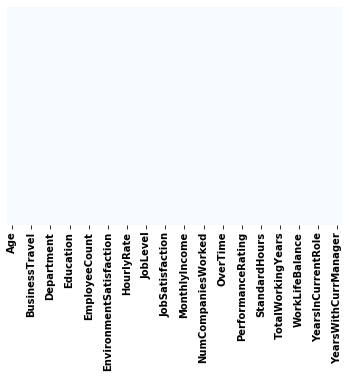

In [14]:
sns.heatmap(data=employee_data_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

From the output plot, it shhows that there are no missing data.

## 4 - Exploratory Data Analysis (EDA):

In [ ]:
break

In [ ]:
<img src="Description Images/.png" width="750">

Image Ref -> 